# 3. 規格化
規格化のアイディアとして

* 強度総和を一定にする
    1. 強度平均で割る:ラマンシフトの数(ピクセル数)
    2. 強度総和で割る:1  
* 特定ピークとの比をとる
    (フェニルアラニンが多い？?)
* z化(標準化)

    平均0,分散1にする．
    
    主に機械学習の説明変数の前処理に利用される

* 正規化
    
    最大値が1,最小が0になるようにする．外れ値の影響を強く受ける．

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

,cell_1,cell_3,cell_2,cell_4
601.000000,-0.016822,-0.531924,-0.085948,-0.010437
601.499750,-0.111349,-0.512523,-0.180579,-0.104324
601.999500,-0.097127,-0.409220,-0.166453,-0.090005
602.499250,-0.028265,-0.270874,-0.097680,-0.021584
602.998999,-0.051946,-0.238812,-0.121442,-0.046240
...,...,...,...,...
1598.001001,-0.062377,-0.041979,0.037871,-0.104288
1598.500750,0.073889,0.094233,0.176839,0.032788
1599.000500,0.180451,0.200752,0.286129,0.140233
1599.500250,0.238084,0.258353,0.346513,0.198822


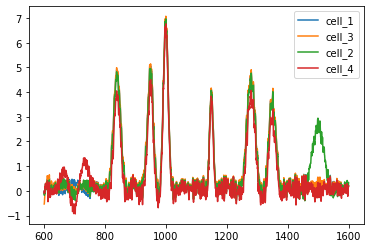

In [2]:
path = "./output/3_smoothing/spectra.csv"
spectra_df= pd.read_csv(path,index_col=0)
display(spectra_df)
spectra_df.plot()
plt.show()


規格化前:
cell_1    1600.580676
cell_3    1671.703687
cell_2    1729.922622
cell_4    1210.785214
dtype: float64

平均で割ることで総和がピクセル数(横軸の刻みの数)
cell_1    2000.0
cell_3    2000.0
cell_2    2000.0
cell_4    2000.0
dtype: float64

総和で割ることで総和が1
cell_1    1.0
cell_3    1.0
cell_2    1.0
cell_4    1.0
dtype: float64

標準化(zスコア化) 平均0,標準偏差1
                  0             1             2             3
count  2.000000e+03  2.000000e+03  2.000000e+03  2.000000e+03
mean   1.620648e-16  4.424239e-17 -1.848244e-16 -5.648260e-17
std    1.000250e+00  1.000250e+00  1.000250e+00  1.000250e+00
min   -9.006726e-01 -9.842616e-01 -9.826974e-01 -1.251423e+00
25%   -5.294166e-01 -5.283540e-01 -5.851406e-01 -5.465157e-01
50%   -4.194676e-01 -4.190538e-01 -4.578799e-01 -3.709072e-01
75%   -1.629358e-01 -1.678499e-01  1.808697e-01  1.767465e-02
max    4.520636e+00  4.485865e+00  4.415249e+00  5.005328e+00


[]

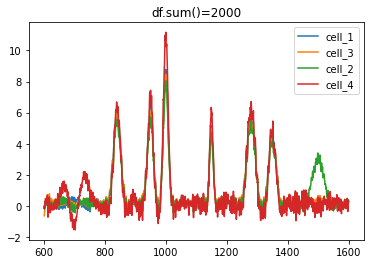

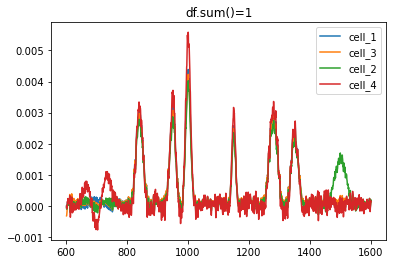

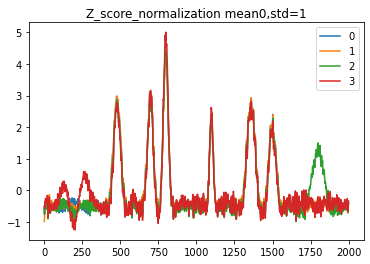

In [3]:
print(f"\n規格化前:\n{spectra_df.sum()}")

spectra_sum_pixel = spectra_df/spectra_df.mean()
print(f"\n平均で割ることで総和がピクセル数(横軸の刻みの数)\n{spectra_sum_pixel.sum()}")
spectra_sum_pixel.plot()
plt.title("df.sum()=2000")
plt.plot()

spectra_sum_1 = spectra_df/spectra_df.sum()
print(f"\n総和で割ることで総和が1\n{spectra_sum_1.sum()}")
spectra_sum_1.plot()
plt.title("df.sum()=1")
plt.plot()

Z_score_normalization = pd.DataFrame(scipy.stats.zscore(spectra_df))
print(f"\n標準化(zスコア化) 平均0,標準偏差1\n{Z_score_normalization.describe()}")
Z_score_normalization.plot()
plt.title("Z_score_normalization mean0,std=1")
plt.plot()

In [4]:
path = "./output/4_standardization/spectra.csv"
spectra_sum_pixel.to_csv(path)